# Case Study

## Stock Market Analysis and Prediction

A certain financial planning company wants to upgrade there business model. This time they don't want to rely on human intuition to do the analysis and come up with a solution, it takes time and the technology that they are using does not upgrade itself to the current situation rather it works upon the previous learned data which make the prediction very feeble, due to this reason the company is going through a big loss. 

<b> Aim: </b>

- Build a new business model which relies not on human intuition.
- Build a system which can correct itself and being less prone to error
- Build an accurate system where the indicators are accurate enough to analyze and predict correctly.
- Build a system that is fast and reliable. 



## Solution

1. We can try to develop indicators which should be precise enough to show us the status of the current trend of the stock market.
2. Using unsupervised learning to find the hidden patterns.
3. Use Fourier Transformation to clean the noise from the data.
4. Use Neural Networks to predict the signal. Mostly LSTM. 
5. Testing

## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import datetime
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

## Fetching Data

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'as.ipynb',
 'Bulldozer_Random_Forest.ipynb',
 'Bulldozer_Sales_Analysis.ipynb',
 'Case Study',
 'Datasets',
 'Dipin_0102_Simple_Linear_Regression.ipynb',
 'Dipin_Medical Insurance.ipynb',
 'Fuel_Consumption.ipynb',
 'House_Price_Prediction.ipynb',
 'Logistic Regression_iris Dataset.ipynb',
 'Notes_02_Visuals.ipynb',
 'Operating_Outliers.ipynb',
 'Patient Expense Prediction Analysis for Doctors.ipynb',
 'Patient Expense Prediction Analysis for Doctors_old.ipynb',
 'Patient-Analysis-Expenses.ipynb',
 'Price_Prediction_Bulldozer.ipynb',
 'Random_Forest_Buldozer Data.ipynb',
 'Stock Market Prediction .ipynb',
 'Stock_Analysis.ipynb',
 'Stock_Market_Analysis_and_Prediction.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'Untitled4.ipynb']

In [4]:
data_raw = pd.read_csv('Case Study//AAPL.csv', date_parser=parser)
data = data_raw.copy()
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,174.279999,175.149994,172.889999,174.970001,172.709381,25886200
1,2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200
2,2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400
3,2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400
4,2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400
5,2019-03-08,170.320007,173.070007,169.500000,172.910004,170.676025,23999400
6,2019-03-11,175.490005,179.119995,175.350006,178.899994,176.588608,32011000
7,2019-03-12,180.000000,182.669998,179.369995,180.910004,178.572662,32467600
8,2019-03-13,182.250000,183.300003,180.919998,181.710007,179.362320,31032500
9,2019-03-14,183.899994,184.100006,182.559998,183.729996,181.356216,23579500


## Understanding the statistics of the data

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,231.473531,233.799008,229.613929,231.922857,230.521529,2.877633e+07
std,44.619609,45.118373,44.275068,44.850701,45.444601,1.170700e+07
min,170.320007,173.070007,169.500000,172.500000,170.271317,1.136200e+07
25%,198.770000,200.529999,197.844998,199.182495,196.884155,2.111072e+07
50%,211.444999,213.809997,210.275001,211.135002,209.228791,2.622035e+07
75%,264.227509,266.620002,262.572495,265.624993,264.996071,3.291428e+07
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.066275e+08


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null object
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.9+ KB


# Analysis the data and interpret

- We will using graph to visually look at the data and interpret the outcome. 
- Using various indicators we will see the behaviour of the data over time. 
- We will use Fast Fourier Transform to decompose the data and forecast.
- We will use ARIMA to forecast
- PCA -- To denoise
- RandomForest to select features
- Final Prediction Using LSTM

In [7]:
data.Date = pd.to_datetime(data.Date)

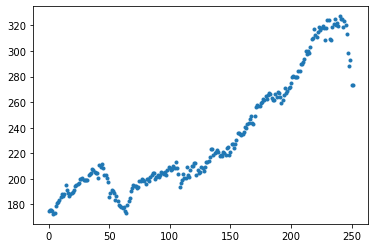

In [8]:
plt.plot(data.Close, '.')

c:\users\dipin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Apple Stock Exchange')

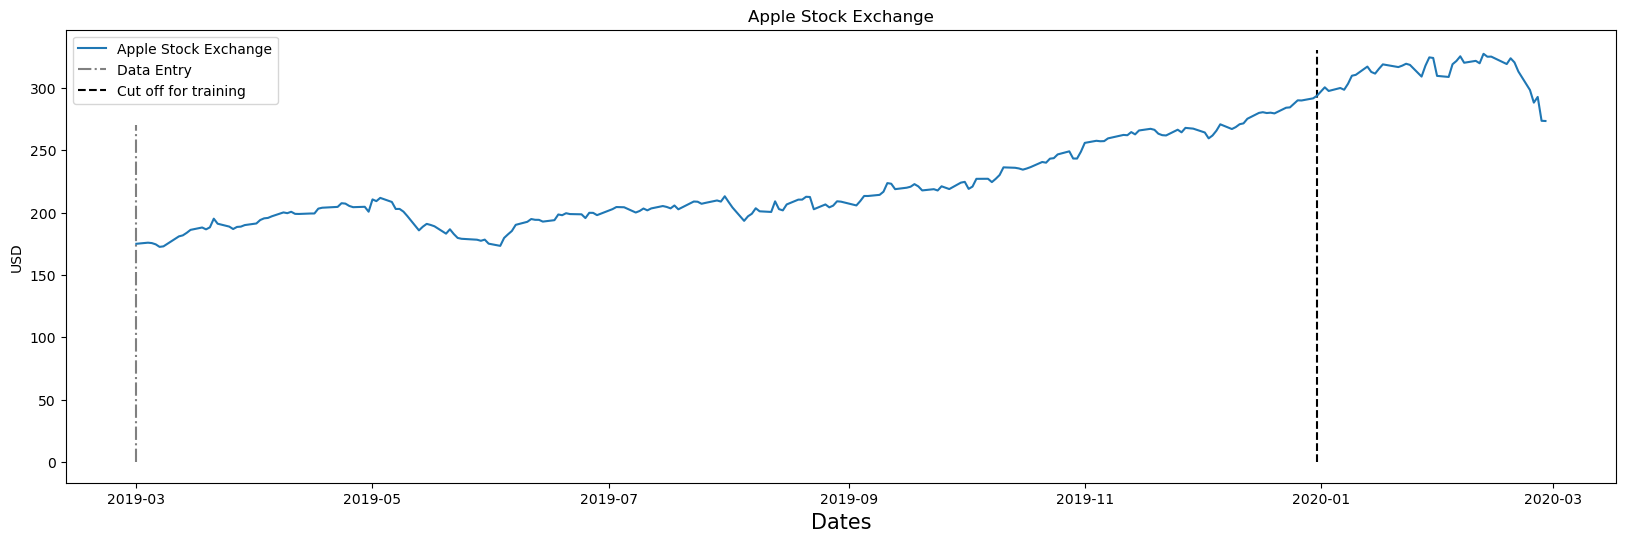

In [9]:
plt.figure(figsize=(20,6), dpi=100)

plt.plot('Date','Close',data=data, label = 'Apple Stock Exchange')
plt.vlines(datetime.date(2019,3, 1), 0, 270, linestyles='-.', colors='gray', label='Data Entry')
plt.vlines(datetime.date(2019,12, 31), 0, 330, linestyles='--', colors='black', label='Cut off for training')
plt.xlabel('Dates', fontsize = 15)
plt.ylabel('USD')
plt.legend()
plt.title('Apple Stock Exchange')

# Creating Indicators

Some the important indicators that we find in Stock Market is:

1. Moving Average
2. Moving Average Convergence/ Divergence -- MACD
3. Exponential Moving Average
4. Bollinger Band
- RSI
- Momentum

## Moving Average

In [10]:
data['m7']=data.Close.rolling(window=7).mean()
data['m21']=data.Close.rolling(window=21).mean()

## Moving Average Convergence/Divergence

In [11]:
data['26ema'] = data.Close.ewm(span=26).mean() #slow
data['12ema'] = data.Close.ewm(span=12).mean() #fast
data['MACD'] = (data['12ema'] - data['26ema'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,m7,m21,26ema,12ema,MACD
0,2019-03-01,174.279999,175.149994,172.889999,174.970001,172.709381,25886200,NaN,NaN,174.970001,174.970001,0.000000
1,2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200,NaN,NaN,175.426927,175.446670,0.019744
2,2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400,NaN,NaN,175.463960,175.479194,0.015234
3,2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400,NaN,NaN,175.200071,175.176415,-0.023656
4,2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400,NaN,NaN,174.573913,174.449243,-0.124671


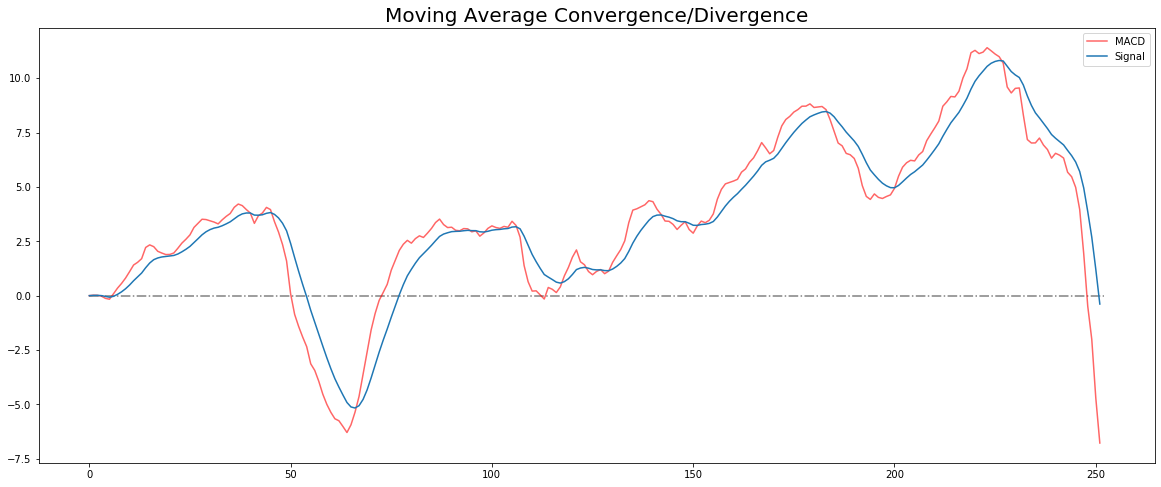

In [12]:
plt.figure(figsize=(20,8))
plt.plot(data.MACD, label='MACD', color='r', alpha=0.6)
# plt.plot(np.log(data.Momentum))
plt.hlines(0, 0, data.shape[0],linestyles='-.', colors='gray')
plt.plot(data.MACD.ewm(span=9).mean(), label='Signal')
plt.fill_between(data.shape[0], y1=(data.MACD-data.MACD.ewm(span=9).mean()))
plt.title('Moving Average Convergence/Divergence', fontsize=20)
plt.legend()
plt.show()

# Creating Bollinger Band

In [13]:
data['20sd'] = data.Close.rolling(window=20).std()
data['upperBand'] = data['m21'] + (data['20sd']*2)
data['lowerBand'] = data['m21'] - (data['20sd']*2)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,m7,m21,26ema,12ema,MACD,20sd,upperBand,lowerBand
0,2019-03-01,174.279999,175.149994,172.889999,174.970001,172.709381,25886200,NaN,NaN,174.970001,174.970001,0.000000,NaN,NaN,NaN
1,2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200,NaN,NaN,175.426927,175.446670,0.019744,NaN,NaN,NaN
2,2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400,NaN,NaN,175.463960,175.479194,0.015234,NaN,NaN,NaN
3,2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400,NaN,NaN,175.200071,175.176415,-0.023656,NaN,NaN,NaN
4,2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400,NaN,NaN,174.573913,174.449243,-0.124671,NaN,NaN,NaN


# Exponential Moving Average

In [14]:
data['ema'] = data['Close'].ewm(com=0.5).mean()

In [15]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,m7,m21,26ema,12ema,MACD,20sd,upperBand,lowerBand,ema
0,2019-03-01,174.279999,175.149994,172.889999,174.970001,172.709381,25886200,NaN,NaN,174.970001,174.970001,0.000000,NaN,NaN,NaN,174.970001
1,2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200,NaN,NaN,175.426927,175.446670,0.019744,NaN,NaN,NaN,175.630005
2,2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400,NaN,NaN,175.463960,175.479194,0.015234,NaN,NaN,NaN,175.560770
3,2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400,NaN,NaN,175.200071,175.176415,-0.023656,NaN,NaN,NaN,174.858253
4,2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400,NaN,NaN,174.573913,174.449243,-0.124671,NaN,NaN,NaN,173.279588


# Create Momentum

In [16]:
data['Momentum'] = data['Close'] - 1

In [17]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,m7,m21,26ema,12ema,MACD,20sd,upperBand,lowerBand,ema,Momentum
0,2019-03-01,174.279999,175.149994,172.889999,174.970001,172.709381,25886200,NaN,NaN,174.970001,174.970001,0.000000,NaN,NaN,NaN,174.970001,173.970001
1,2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200,NaN,NaN,175.426927,175.446670,0.019744,NaN,NaN,NaN,175.630005,174.850006
2,2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400,NaN,NaN,175.463960,175.479194,0.015234,NaN,NaN,NaN,175.560770,174.529999
3,2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400,NaN,NaN,175.200071,175.176415,-0.023656,NaN,NaN,NaN,174.858253,173.520004
4,2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400,NaN,NaN,174.573913,174.449243,-0.124671,NaN,NaN,NaN,173.279588,171.500000


In [18]:
# dataset = data.iloc[-last_days:, :]
x_ = range(3, data.shape[0])
x_ =list(data.index)
x_

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


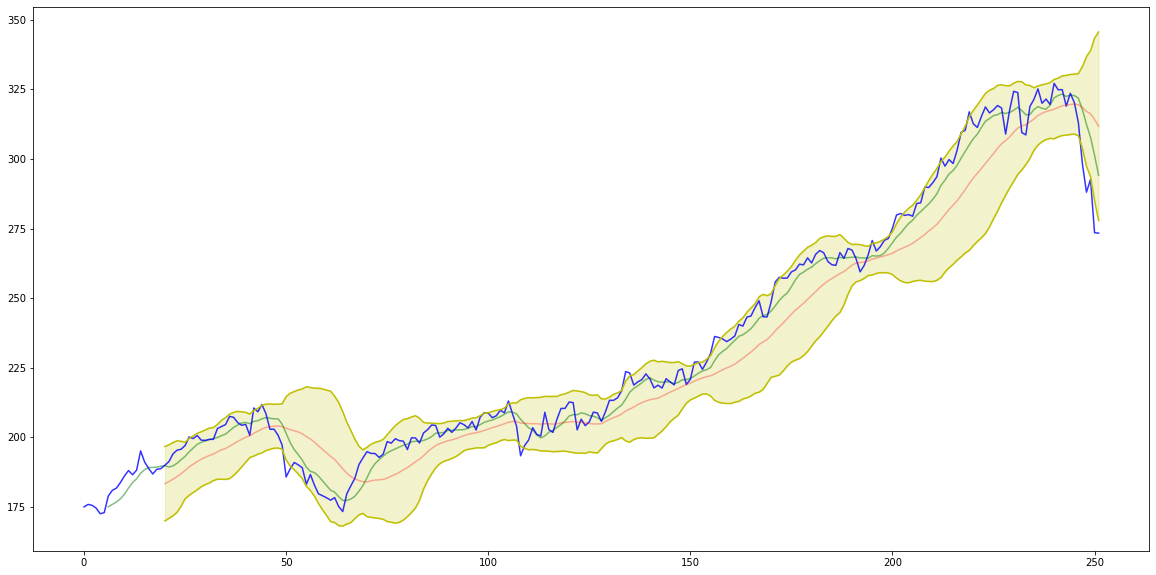

In [19]:
plt.figure(figsize=(20,10))
plt.plot(data['m7'],label='MA 7', color='g',linestyle='-', alpha=0.5)
plt.plot(data['Close'],label='Closing Price', color='b', alpha=0.8)
plt.plot(data['m21'],label='MA 21', color='r',linestyle='-', alpha = 0.3)
plt.plot(data['upperBand'],label='Upper Band', color='y')
plt.plot(data['lowerBand'],label='Lower Band', color='y')
plt.fill_between(x_, data['lowerBand'], data['upperBand'], alpha=0.2, color='y')
# plt.title('Technical indicators for Apple Inc - last {} days.'.format(250), fontsize=20)
# plt.ylabel('USD')
# plt.legend(fontsize=12)

# Relative Strength Index

In [20]:
diff = data.Close.diff()
gain = diff.where(diff<0, 0)
loss = diff.where(diff>0, 0)

period = 14
avgGain = gain.ewm(com=period-2, min_periods = period).mean()
avgLoss = loss.ewm(com=period-2, min_periods = period).mean()
rs = abs(avgGain/avgLoss)

data['RSI'] = 100 - (100/(1+rs))

In [21]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,m7,m21,26ema,12ema,MACD,20sd,upperBand,lowerBand,ema,Momentum,RSI
0,2019-03-01,174.279999,175.149994,172.889999,174.970001,172.709381,25886200,NaN,NaN,174.970001,174.970001,0.000000,NaN,NaN,NaN,174.970001,173.970001,NaN
1,2019-03-04,175.690002,177.750000,173.970001,175.850006,173.578033,27436200,NaN,NaN,175.426927,175.446670,0.019744,NaN,NaN,NaN,175.630005,174.850006,NaN
2,2019-03-05,175.940002,176.000000,174.539993,175.529999,173.262161,19737400,NaN,NaN,175.463960,175.479194,0.015234,NaN,NaN,NaN,175.560770,174.529999,NaN
3,2019-03-06,174.669998,175.490005,173.940002,174.520004,172.265228,20810400,NaN,NaN,175.200071,175.176415,-0.023656,NaN,NaN,NaN,174.858253,173.520004,NaN
4,2019-03-07,173.869995,174.440002,172.020004,172.500000,170.271317,24796400,NaN,NaN,174.573913,174.449243,-0.124671,NaN,NaN,NaN,173.279588,171.500000,NaN


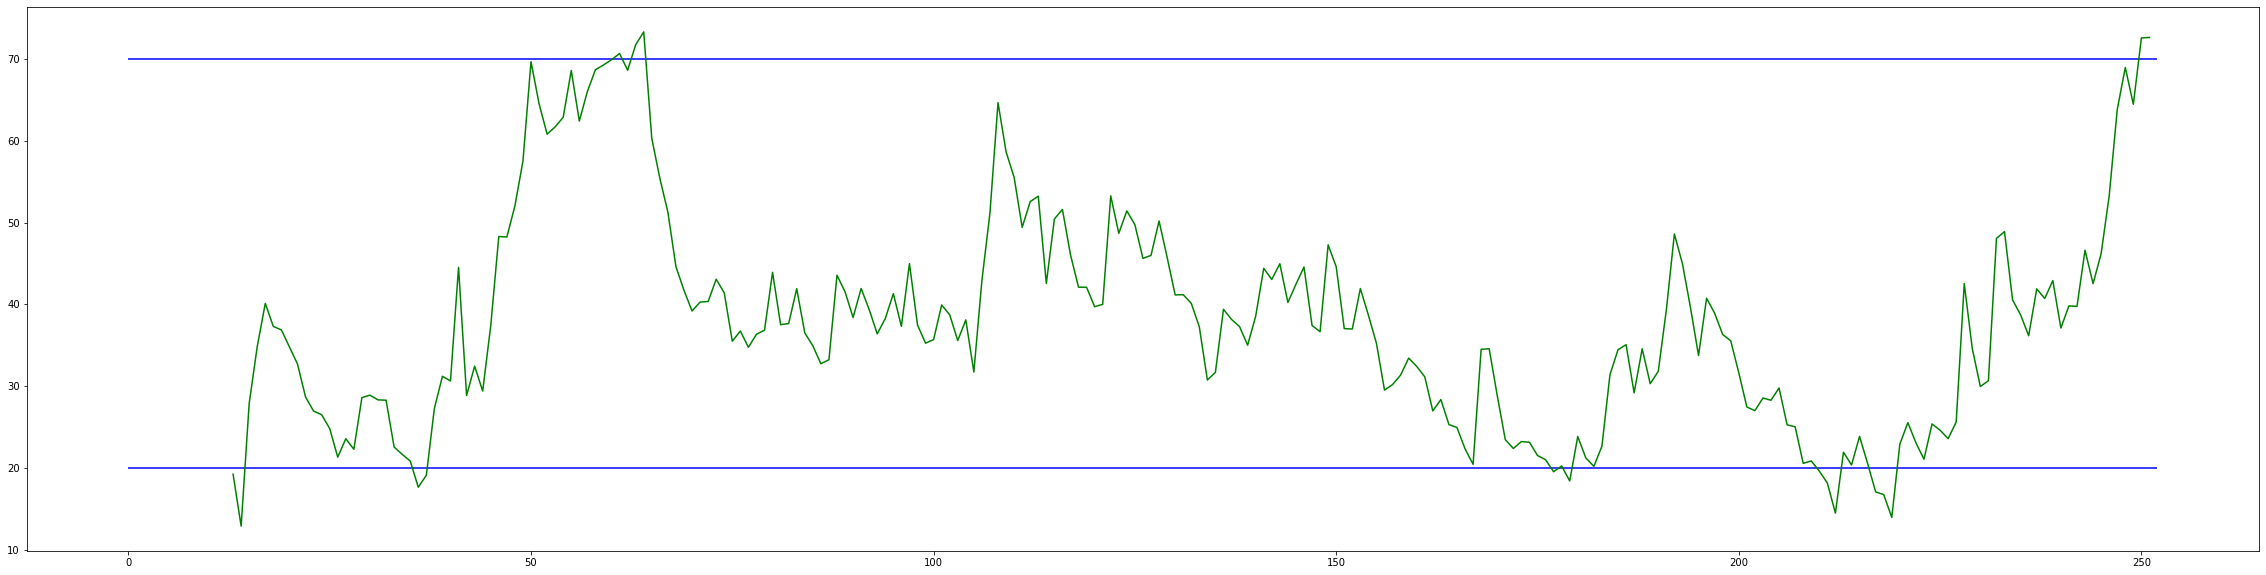

In [22]:
plt.figure(figsize=(40, 10))
plt.plot(data.RSI, 'g')
# plt.hlines(100, xmax=data.shape[0], xmin=0, colors='b', linestyles='-')
plt.hlines(70, xmax=data.shape[0], xmin=0, colors='b', linestyles='-')
plt.hlines(20, xmax=data.shape[0], xmin=0, colors='b', linestyles='-')
plt.show()

# Creating a Fast Fourier Transform

## Why FFT?
The idea here is to decompose the timeseries into something that is simple then we forecast it easily. 

The key advantage of decomposing time series into sine wave is that we can actually re-draw it in a simple eligent sine function. That is, if an event seems inconsistent over a period of time then we use FFT to transform that event to something more predictable. 

In [23]:
data_FFT = data_raw[['Date', 'Close']]

In [24]:
data_FFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
Date     252 non-null object
Close    252 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [25]:
close_fft = np.fft.fft(np.asarray(data_raw.Close.to_list()))
fft = pd.DataFrame({'close':close_fft})

fft['absolute'] = fft.close.apply(lambda x : np.abs(x))
fft['angle'] = fft.close.apply(lambda x: np.angle(x))

print(fft.head())

                      close      absolute     angle
0    58444.559934+0.000000j  58444.559934  0.000000
1  2599.150384+5846.794094j   6398.482937  1.152490
2   -84.442939+2984.769560j   2985.963820  1.599080
3  -359.867368+1699.983072j   1737.655595  1.779405
4  -990.564785+1698.878440j   1966.572283  2.098674


c:\users\dipin\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


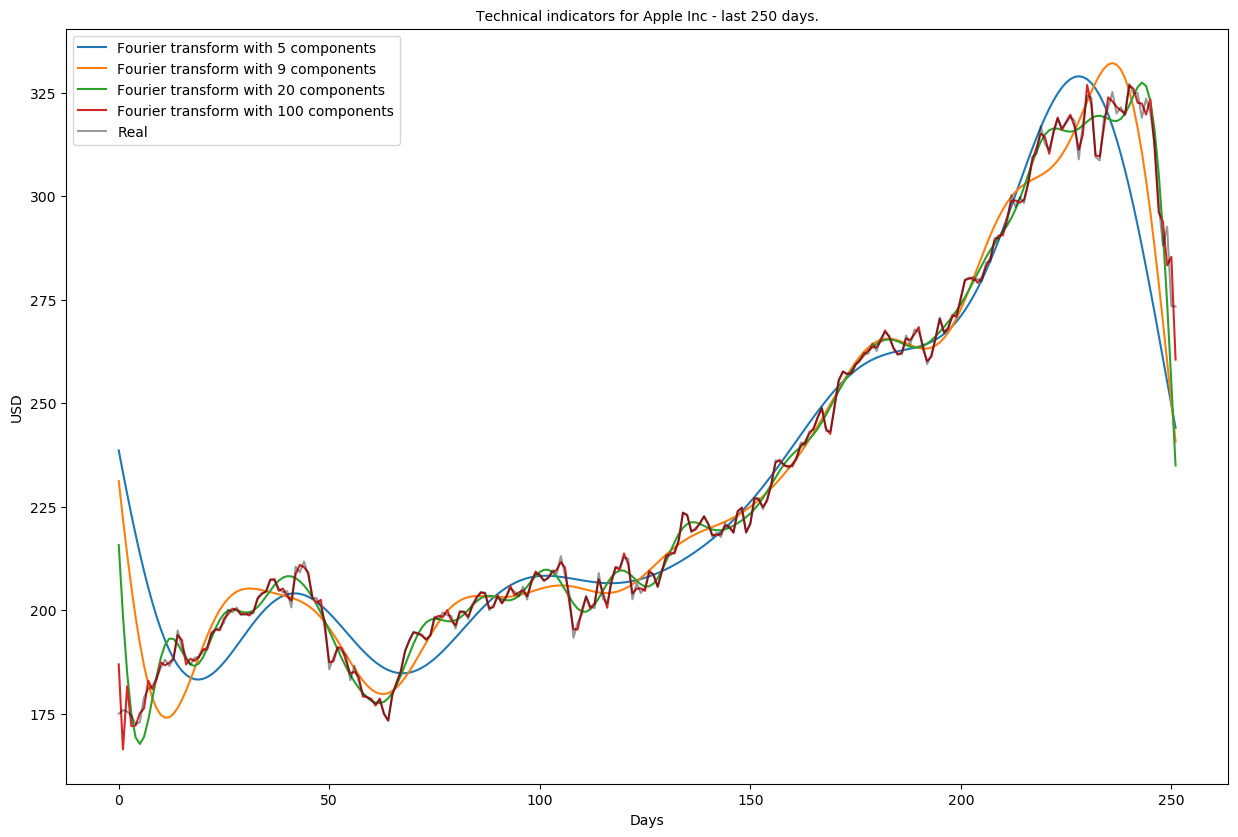

In [26]:
plt.figure(figsize=(15, 10), dpi=100)
fft_list = np.asarray(fft['close'].tolist())


for i in [5, 9, 20, 100]:
    fft_list_m10= np.copy(fft_list) 
    fft_list_m10[i:-i]=0
    
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(i))

    
plt.plot(data_FFT.Close,  label='Real', color='black', alpha=0.4)
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Technical indicators for Apple Inc - last {} days.'.format(250), fontsize=10)
plt.legend()
plt.show()

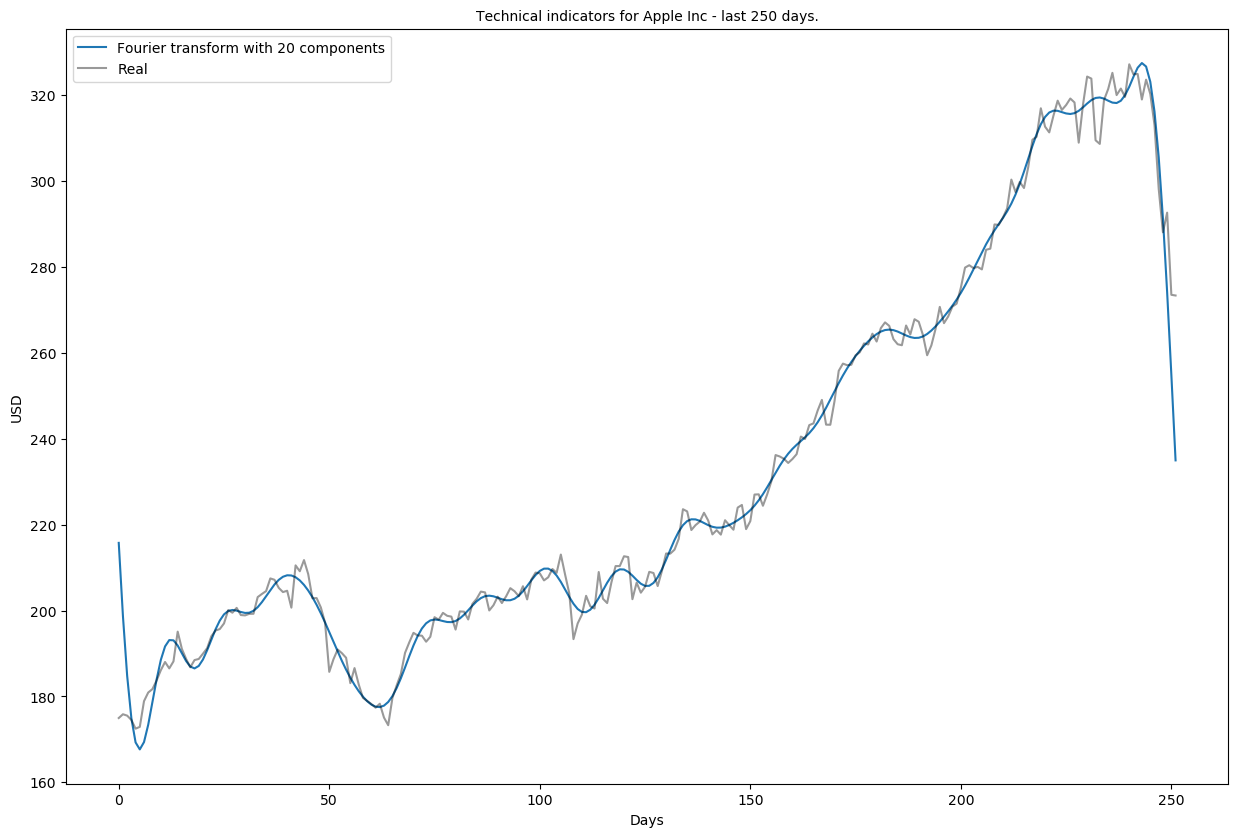

In [27]:
plt.figure(figsize=(15, 10), dpi=100)
fft_list = np.asarray(fft['close'].tolist())


for i in [20]:
    fft_list_m10= np.copy(fft_list) 
    fft_list_m10[i:-i]=0
    
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(i))

    
plt.plot(data_FFT.Close,  label='Real', color='black', alpha=0.4)
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Technical indicators for Apple Inc - last {} days.'.format(250), fontsize=10)
plt.legend()
plt.show()

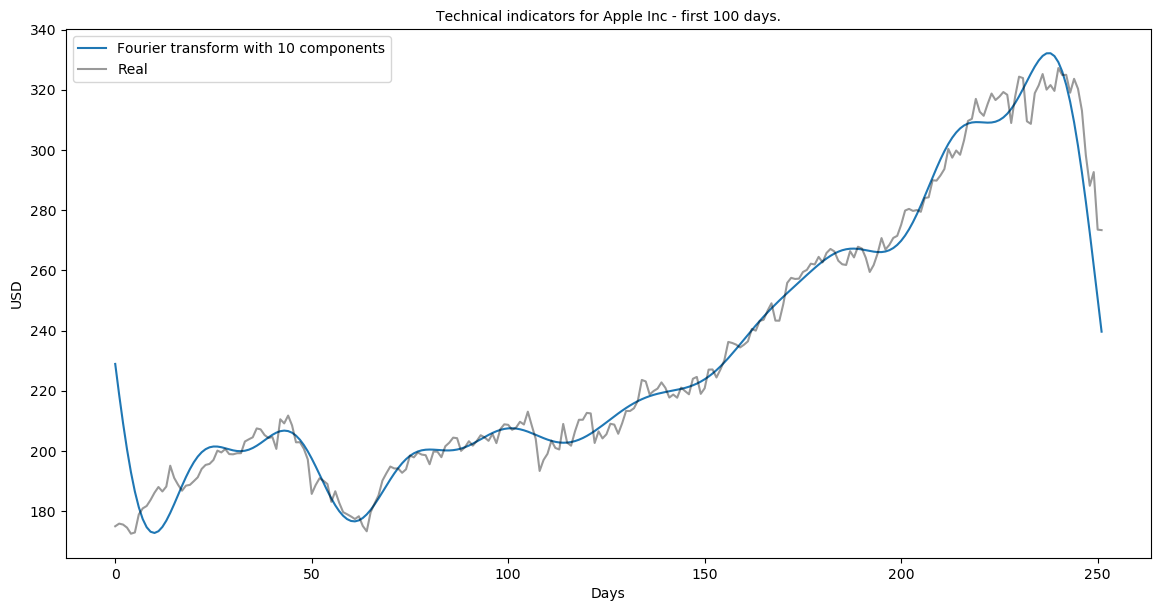

In [28]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft['close'].tolist())


for i in [10]:
    fft_list_m10= np.copy(fft_list) 
    fft_list_m10[i:-i]=0
    
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(i))

    
plt.plot(data_FFT.Close,  label='Real', color='black', alpha=0.4)
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Technical indicators for Apple Inc - first {} days.'.format(100), fontsize=10)
plt.legend()
plt.show()

We use Fourier transforms for the purpose of extracting long and short-term trends so we will use the transforms with 3, 6, and 9 components. You can infer that the transform with 3 components serves as the long term trend.

# ARIMA - Auto Regressive Integrated Moving Average

Auto Regressive Integrated Moving Average is actually a class of models that 'explains' a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values




In [29]:
dataArima = data[['Date','Close']]

In [30]:
dataArima = dataArima.set_index('Date')

In [31]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime
import warnings
import itertools

In [32]:
p = d = q = range(0,5)
pdq = list(itertools.product(p,d,q))

season_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p,d,q))]

In [33]:
warnings.filterwarnings("ignore")
param = []
for i in pdq:
    try:
        model = ARIMA(dataArima, order=i)
        model_fit = model.fit()
        print(i, model_fit.aic)
        param.append(i, model_fit.aic)
    except:
        continue

(0, 0, 0) 2635.025998853028
(0, 0, 1) 2310.578811121077
(0, 1, 0) 1396.1409854089234
(0, 1, 1) 1398.0826215164825
(0, 1, 2) 1399.6823508459152
(0, 1, 3) 1401.3608400115334
(0, 1, 4) 1393.4627768623436
(0, 2, 0) 1561.1898210931674
(0, 2, 1) 1397.1853129715028
(0, 2, 2) 1398.6508010913203
(0, 2, 3) 1397.1417067828015
(0, 2, 4) 1396.397721321609
(1, 0, 0) 1410.8682582343727
(1, 0, 1) 1412.6828600699932
(1, 0, 2) 1414.5190804728181
(1, 0, 3) 1416.3411148336409
(1, 0, 4) 1407.2776854740596
(1, 1, 0) 1398.0878465770086
(1, 1, 1) 1400.029822143189
(1, 1, 2) 1401.661847705906
(1, 1, 3) 1401.692813307347
(1, 1, 4) 1391.2155401589735
(1, 2, 0) 1497.0979773960269
(1, 2, 1) 1398.7910994468125
(1, 2, 2) 1399.5376264077427
(1, 2, 4) 1396.4482192700377
(2, 0, 0) 1412.693884665312
(2, 0, 1) 1411.4235433245044
(2, 0, 2) 1410.8253320655544
(2, 0, 3) 1416.7505650482512
(2, 0, 4) 1403.0199947573997
(2, 1, 0) 1399.510860271479
(2, 1, 1) 1401.4787143196527
(2, 1, 2) 1421.7474355040576
(2, 1, 3) 1399.1556741

In [34]:
model = ARIMA(dataArima, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  251
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -696.070
Method:                           css   S.D. of innovations              3.874
Date:                Fri, 13 Mar 2020   AIC                           1396.141
Time:                        09:24:16   BIC                           1403.192
Sample:                             1   HQIC                          1398.978
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3920      0.245      1.603      0.109      -0.087       0.871


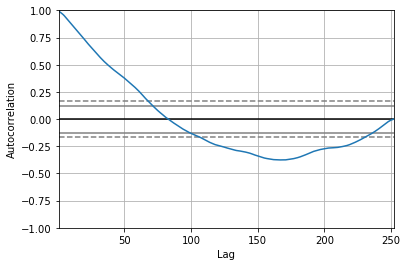

<Figure size 800x560 with 0 Axes>

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataArima)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

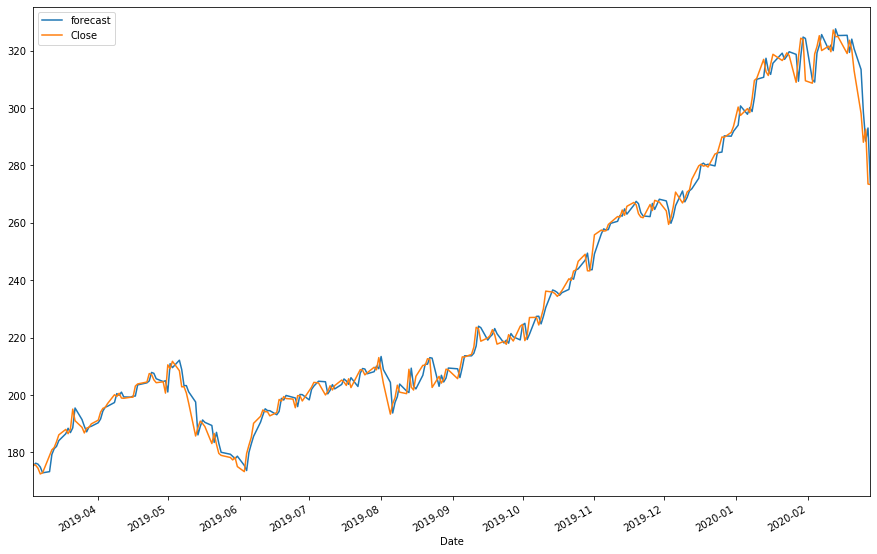

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
model_fit.plot_predict(ax=ax)

plt.show()

# Principal Component Analysis

In [37]:
from sklearn.decomposition import PCA

In [38]:
dataModel = data.dropna()
dataModel.shape

(232, 18)

In [39]:
X = dataModel.drop(['Date', 'Close'], axis=1)
y = dataModel.Close

In [40]:
decomp = PCA(n_components=3, whiten=True)

In [41]:
X_PCA = decomp.fit_transform(X)

In [42]:
data.Close.mean()

231.9228568809524

In [43]:
PCA_data = pd.DataFrame(data=X_PCA, columns=['PCA1', 'PCA2','PCA3'])
PCA_data.head()

,PCA1,PCA2,PCA3
0,-0.419947,-1.007115,-0.445902
1,-0.058141,-1.068111,-0.746571
2,-0.487148,-0.936218,-0.761426
3,-0.444545,-0.913269,-0.901914
4,-0.794524,-0.817834,-0.693108


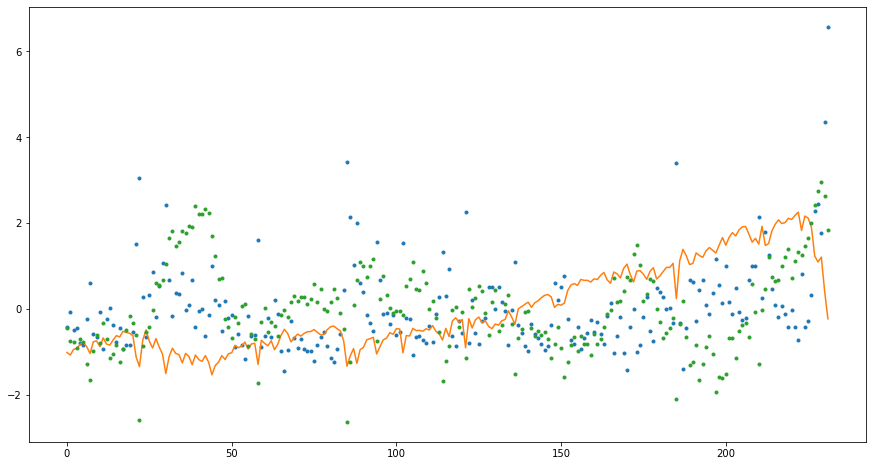

In [44]:
plt.figure(figsize=(15,8))
plt.plot(PCA_data.PCA1, '.')
plt.plot(PCA_data.PCA2, '-')
plt.plot(PCA_data.PCA3, '.')

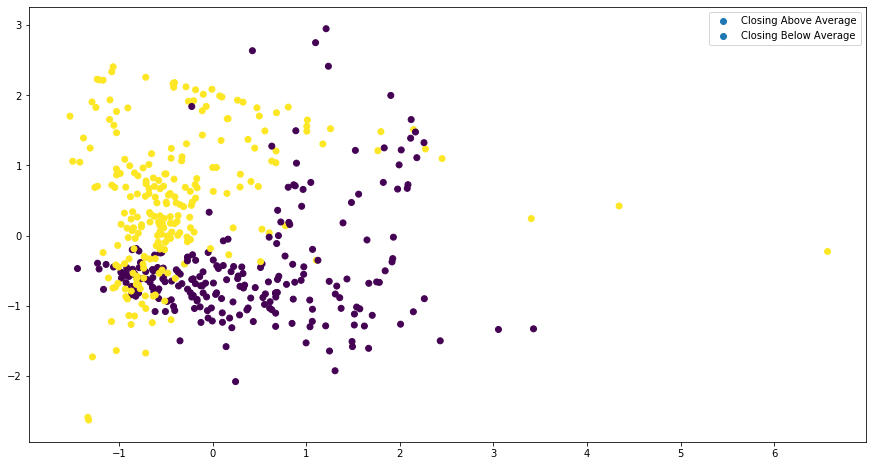

In [45]:
plt.figure(figsize=(15,8))
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=(y>=227), label='Closing Above Average')
plt.scatter(X_PCA[:,1], X_PCA[:,2], c=(y<227), label='Closing Below Average')
plt.legend()
plt.show()

## RandomForest for Feature Importance

Our data contains quite a number of features. Some of these features are purely noises that we need to get rid of. To see which features are promising we need to use random forerst regressor, this we basically create a relationship of all the features with target feature i.e 'Close' price and will give output based upon percentage as to which feature is affected more with the target feature. What this will do is that we can closely monitor a particular feature and try to alter it so that our designed model gives a good prediction. 

In [46]:
dataModel = data.dropna()
dataModel.shape

(232, 18)

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def modelScore(m):
    print([rmse(m.predict(X_train),y_train), rmse(m.predict(X_test),y_test), 
          m.score(X_train, y_train), m.score(X_test, y_test)])

In [49]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=10)

In [50]:
X = dataModel.drop(['Date', 'Close'], axis=1)
y = dataModel.Close
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
model.score(X,y)

0.9997283844038091

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1)

model = RandomForestRegressor(n_jobs=-1, n_estimators=50, max_depth=12, max_features='sqrt',
                             oob_score=True, random_state=23, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=23, verbose=0, warm_start=False)

In [53]:
modelScore(model)

[0.7740132605712979, 0.9113307889768404, 0.9996887341317845, 0.9996095590125015]


In [54]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)

In [55]:
feature_importances

,importance
Momentum,0.142358
High,0.116929
Adj Close,0.109645
ema,0.104992
12ema,0.091132
upperBand,0.084481
m7,0.074723
Low,0.066509
m21,0.057904
lowerBand,0.052706


In [56]:
X = dataModel.drop(['Date','Volume','20sd','RSI','26ema','m21','upperBand','lowerBand', 'High',
                    'Close','12ema','Open', 'Low', 'MACD'], axis=1)
y = dataModel.Close
model.fit(X, y)
model.score(X,y)

0.9998945924783323

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1)

model = RandomForestRegressor(n_jobs=-1, n_estimators=50, max_depth=10, max_features='sqrt',
                             oob_score=True, random_state=23, min_samples_leaf=1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=23, verbose=0, warm_start=False)

In [58]:
modelScore(model)

[0.3557357394602442, 0.7081697426583786, 0.999934250917446, 0.9997642356962545]


In [59]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
feature_importances

,importance
Momentum,0.309143
Adj Close,0.292556
m7,0.225882
ema,0.172419
